In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import re

In [2]:
df=pd.read_csv('/home/diplopia/excel analyze/data/기여도전쟁_내역_2024101008.csv')
df=df.fillna(value=str(0))
df['후원시간'] = pd.to_datetime(df['후원시간'])
df['hour'] = df['후원시간'].dt.hour
df['hour'] = [str(i) for i in df['hour']]
df['day'] = df['후원시간'].dt.day
re_df = df[(df['참여BJ'] != '노블컴퍼니(대표BJ)') & (df['참여BJ'] != '콩승아') & (df['참여BJ'] != '0') & (df['후원하트']>=100)]


In [3]:
vip_list=[]
for i in re_df['후원 아이디(닉네임)']:
    vip_list.append(i.split('(')[1][:-1])

re_df['후원 아이디(닉네임)']=vip_list

/tmp/ipykernel_77597/8002336.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_df['후원 아이디(닉네임)']=vip_list


In [4]:
re_df

,후원시간,후원 아이디(닉네임),후원하트,참여BJ,하트점수,기여도,기타,hour,day
0,2024-10-04 03:47:35,ෆ하빈이의ෆ팬될래,144,우리선아,144,144,0,3,4
1,2024-10-04 03:33:38,ෆ하빈이의ෆ팬될래,1010,우리선아,1010,1010,0,3,4
2,2024-10-04 03:33:10,ෆ하빈이의ෆ팬될래,1249,우리선아,1249,1249,0,3,4
3,2024-10-04 03:31:10,ZO지GO,2222,새리,2222,2222,0,3,4
4,2024-10-04 03:29:40,ZO지GO,999,우리선아,999,999,0,3,4
...,...,...,...,...,...,...,...,...,...
349,2024-10-03 15:53:18,은채궁에하트터는김루팡,1010,은채냥,1010,1010,0,15,3
350,2024-10-03 15:44:25,은채궁에하트터는김루팡,1009,은채냥,1009,1009,0,15,3
351,2024-10-03 15:36:36,현생가용,1028,정윤슬,1028,1028,0,15,3
352,2024-10-03 15:36:11,정윤슬➳❥Kix◡x,1011,정윤슬,1011,1011,0,15,3


## 1. 출연자별 총 하트 합계 그래프

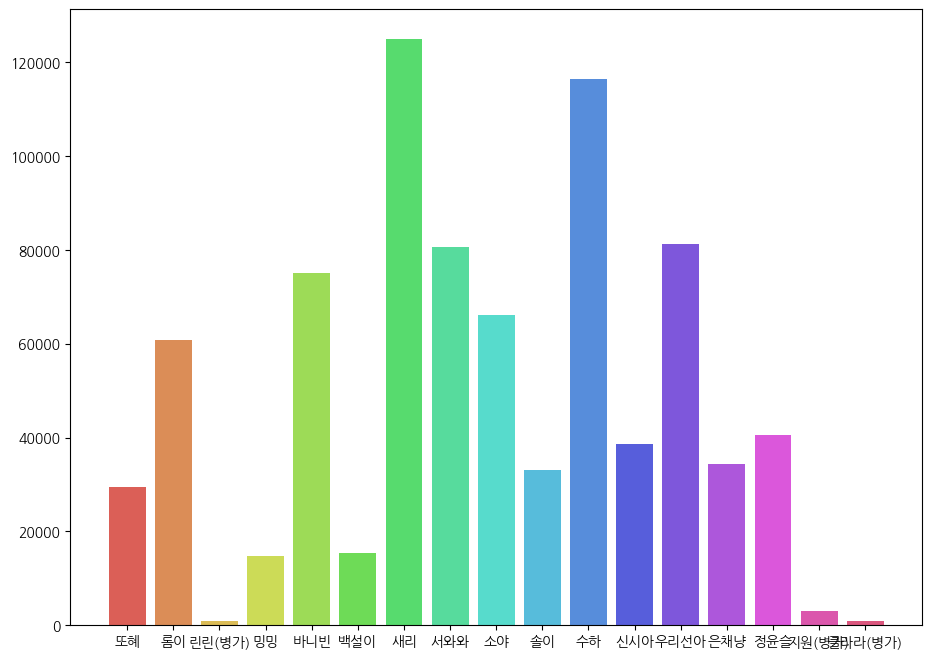

In [5]:
BJ_list = sorted(list(set(re_df['참여BJ'])))

BJ_hearts=[]
for i in BJ_list:
    hearts = re_df[re_df['참여BJ']==i]['후원하트'].sum()
    BJ_hearts.append(hearts)

# plt.rc('font',family='NanumGothic')
colors = sns.color_palette('hls',len(BJ_hearts))
plt.figure(figsize=(11,8))
plt.bar(BJ_list,BJ_hearts,color=colors)
plt.show()

In [6]:
BJ_list

['또혜',
 '롬이',
 '린린(병가)',
 '밍밍',
 '바니빈',
 '백설이',
 '새리',
 '서와와',
 '소야',
 '솔이',
 '수하',
 '신시아',
 '우리선아',
 '은채냥',
 '정윤슬',
 '지원(병가)',
 '클라라(병가)']

### 1-1. 출연자가 받은 하트 통계

In [7]:
#1회차 BJ 평균
avg = sum(BJ_hearts)/len(BJ_list)
median = np.median(BJ_hearts)
max = np.max(BJ_hearts)
min = np.min(BJ_hearts)
lower25 = np.percentile(BJ_hearts,25,interpolation = 'nearest')
higher25 = np.percentile(BJ_hearts,75, interpolation = 'nearest')
print('평균 : ',round(avg), '\n중위값 : ',median, '\n하위25% : ',lower25, '\n상위25% : ',higher25, '\n최대값 : ',max, '\n최솟값 : ',min)

평균 :  48045 
중위값 :  38708.0 
하위25% :  15409 
상위25% :  75055 
최대값 :  125034 
최솟값 :  1010


## 2. 시청자별 총 하트 하계 그래프

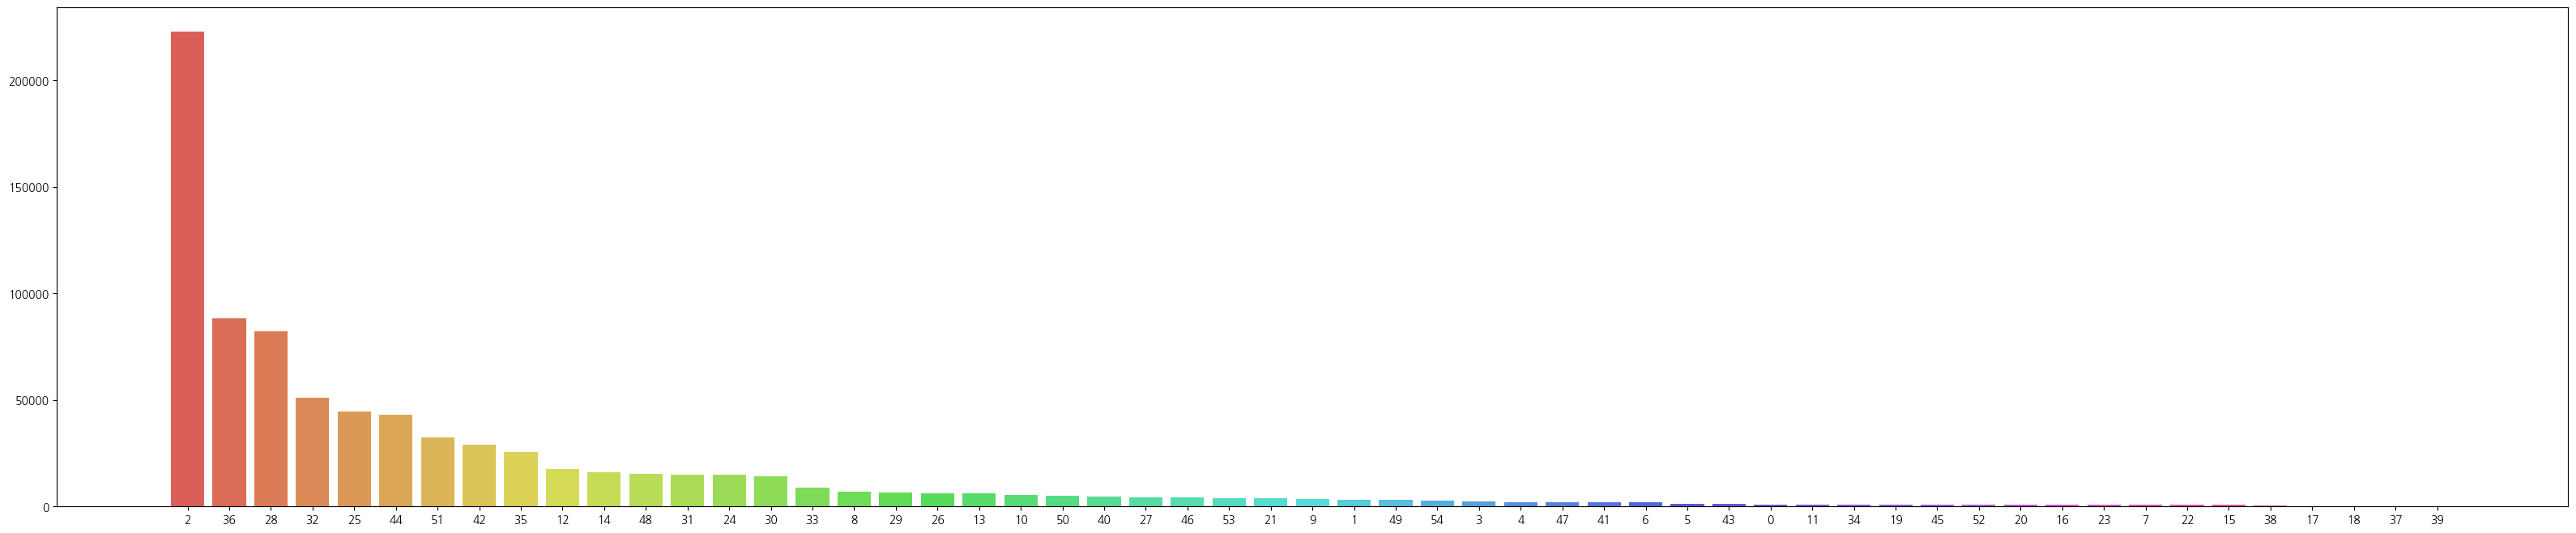

In [8]:
VIP_list = sorted(list(set(re_df['후원 아이디(닉네임)'])))

VIP_hearts=[]
for i in VIP_list:
    hearts = re_df[re_df['후원 아이디(닉네임)']==i]['후원하트'].sum()
    VIP_hearts.append(hearts)

new_df = pd.DataFrame({'ID':[str(i) for i in range(len(VIP_list))],
                        'vip_name':VIP_list,
                       'hearts':VIP_hearts})

sort_df = new_df.sort_values('hearts',ascending=False)
# for i,j in zip(VIP_list,VIP_hearts):
#     print(i,j)
# list(sort_df.index)
colors = sns.color_palette('hls',len(VIP_hearts))
plt.figure(figsize=(40,8))
plt.bar(sort_df['ID'],sort_df['hearts'],color=colors)
plt.show()
# sns.barplot(data=sort_df,x='ID',y='hearts',order=sort_df.sort_values('hearts'))

### 2-1. 시청자가 후원한 하트 통계

In [9]:
#1회차 시청자 평균
avg = sum(VIP_hearts)/len(VIP_list)
median = np.median(VIP_hearts)
max = np.max(VIP_hearts)
min = np.min(VIP_hearts)
lower25 = np.percentile(VIP_hearts,25,interpolation = 'nearest')
higher25 = np.percentile(VIP_hearts,75, interpolation = 'nearest')
print('평균 : ',round(avg), '\n중위값 : ',median, '\n하위25% : ',lower25, '\n상위25% : ',higher25, '\n최대값 : ',max, '\n최솟값 : ',min)

평균 :  14850 
중위값 :  3508.0 
하위25% :  1028 
상위25% :  14251 
최대값 :  222982 
최솟값 :  100


### 2-2. 후원을 많이한 시청자 Rank17

In [10]:
sort_df[:17]

,ID,vip_name,hearts
2,2,ZO지GO,222982
36,36,수하화이팅,88421
28,28,린아❥1004관짝뮤즈,82198
32,32,바니빈ෆ눈먼천사,50885
25,25,드렁큰베어⚘,44555
44,44,재벌박회장,43149
51,51,한가을ღ유깡,32583
42,42,이름이무엇일까요,28893
35,35,소야ღ푸시,25579
12,12,✿새나☾영남에너지⚡,17509


In [11]:
time_df = re_df.groupby(['day','hour'])['후원하트'].sum().reset_index()
# time_df['hour']=[str(i) for i in time_df['hour']]


In [12]:
time_df

,day,hour,후원하트
0,3,15,7385
1,3,16,18801
2,3,17,21981
3,3,18,16854
4,3,19,75677
5,3,20,64795
6,3,21,118697
7,3,22,98435
8,3,23,87567
9,4,0,90708


## 3. 시간별 총 하트 합계 그래프

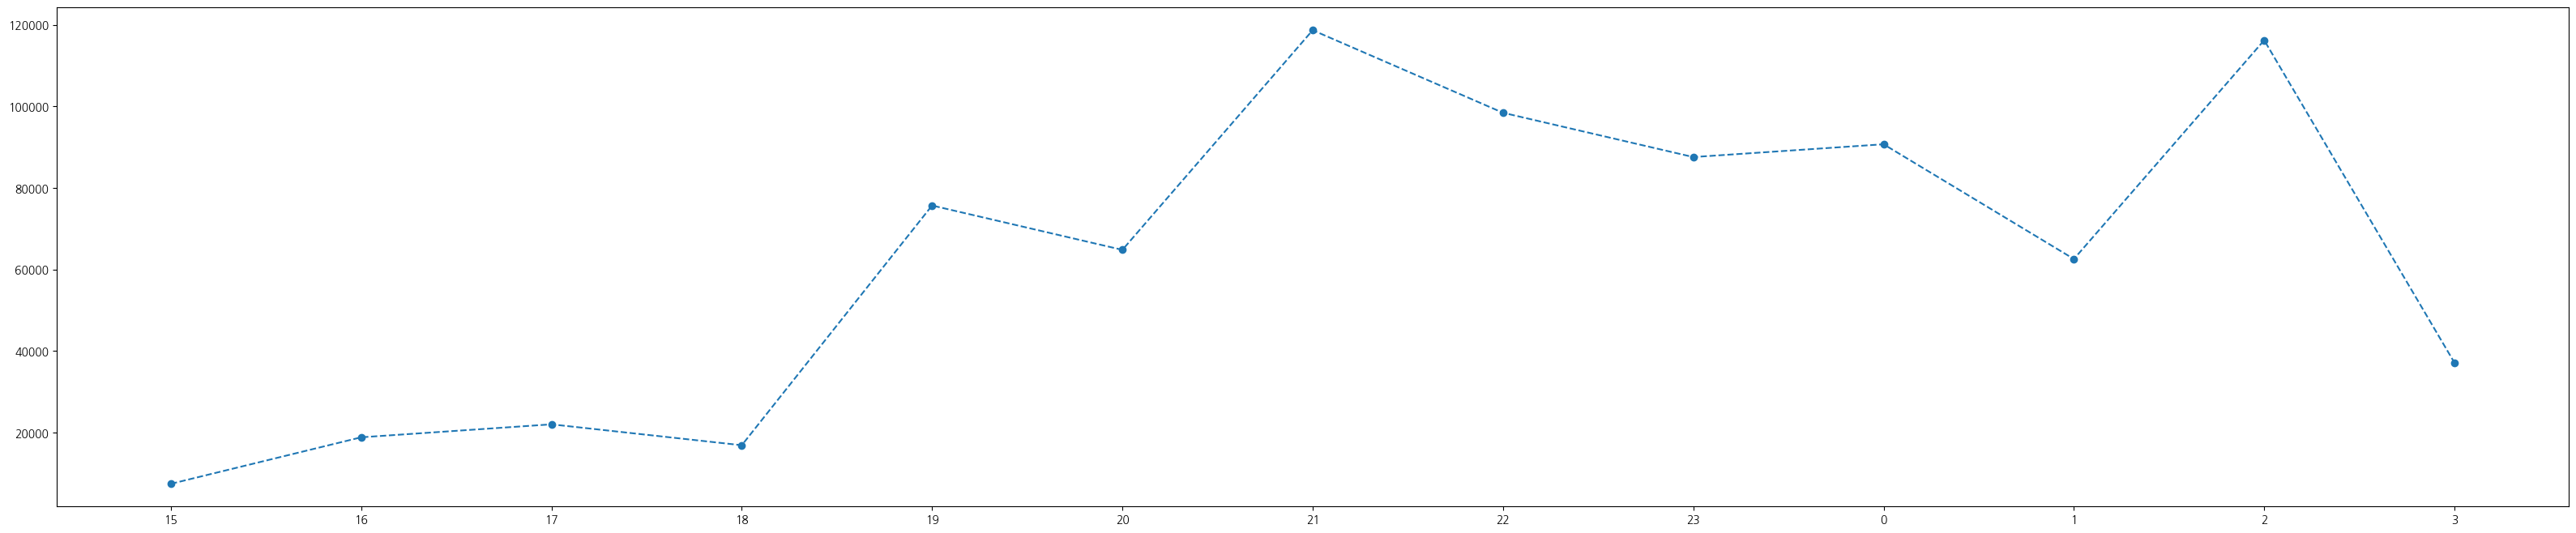

In [13]:
plt.figure(figsize=(40,8))
plt.plot(time_df['hour'],time_df['후원하트'],linestyle='--',marker='o')
plt.show()

## 4. 출연자별 하트 시계열 그래프

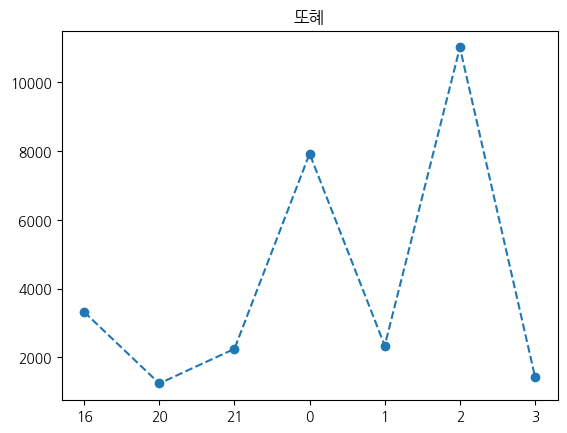

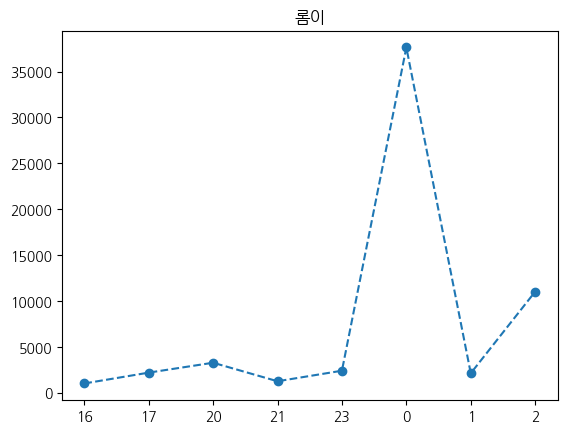

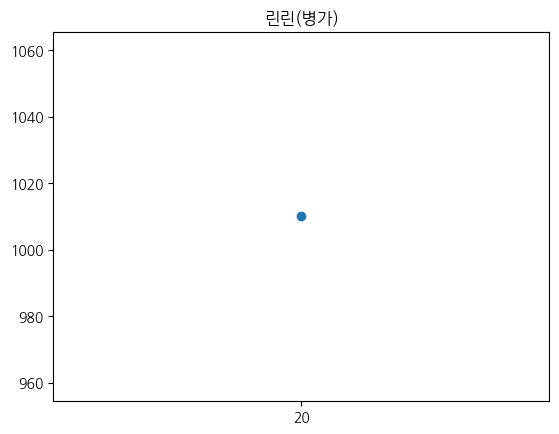

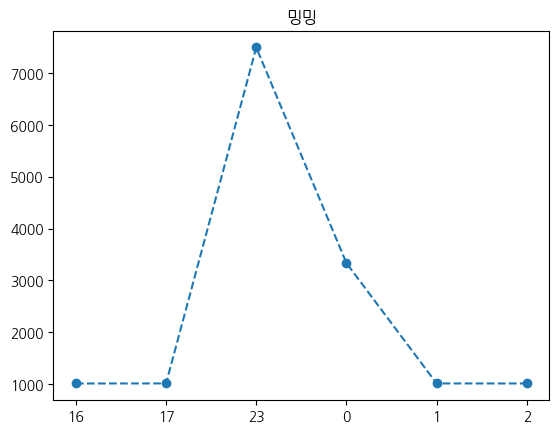

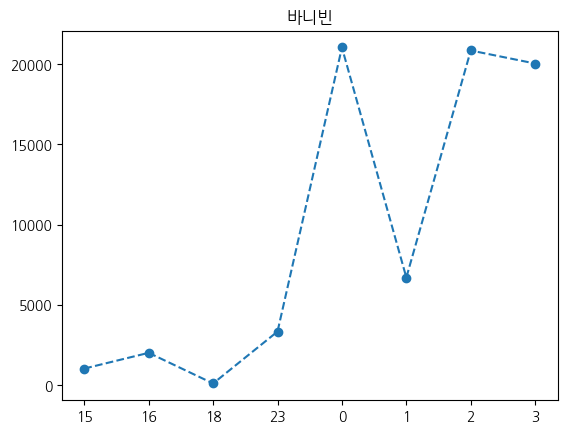

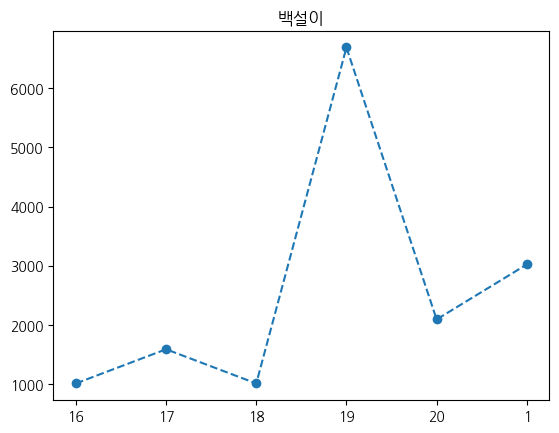

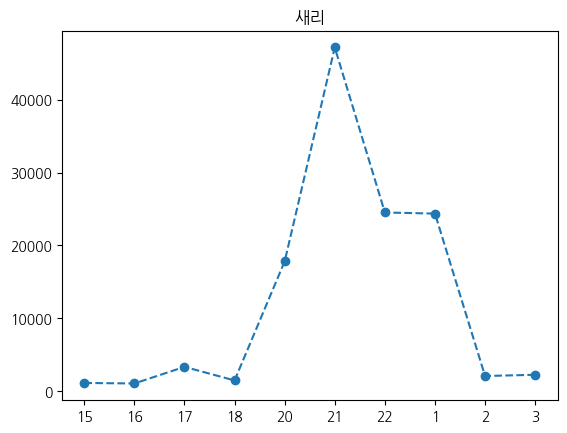

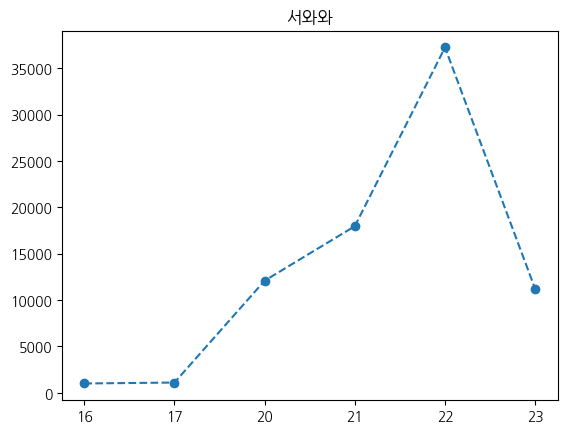

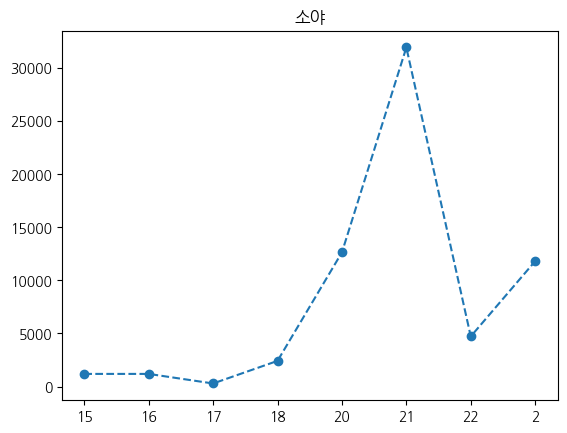

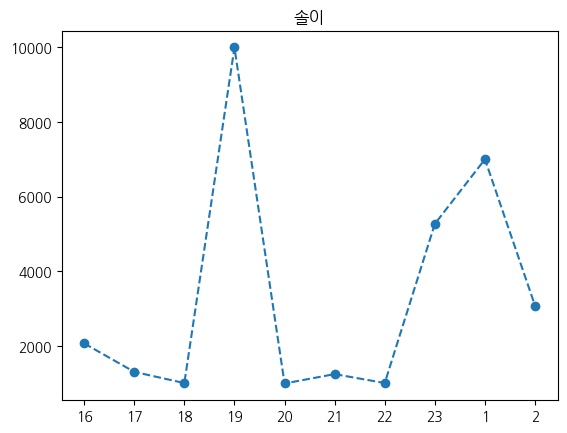

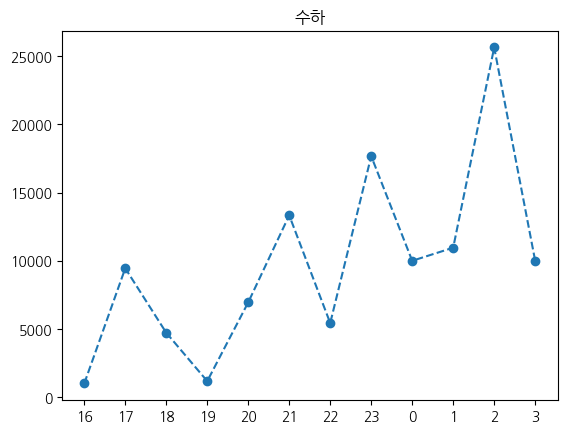

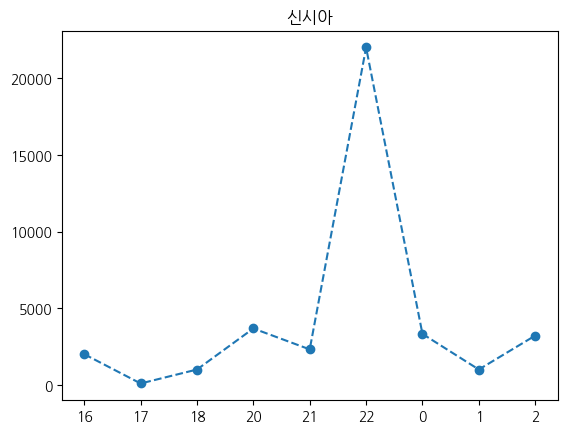

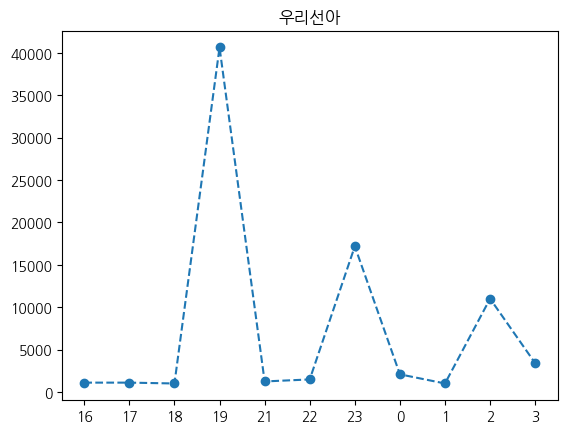

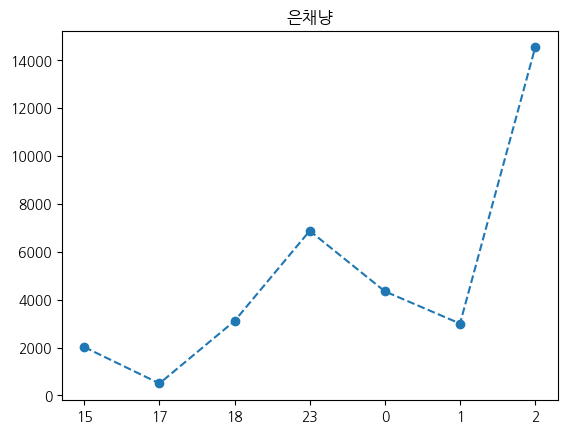

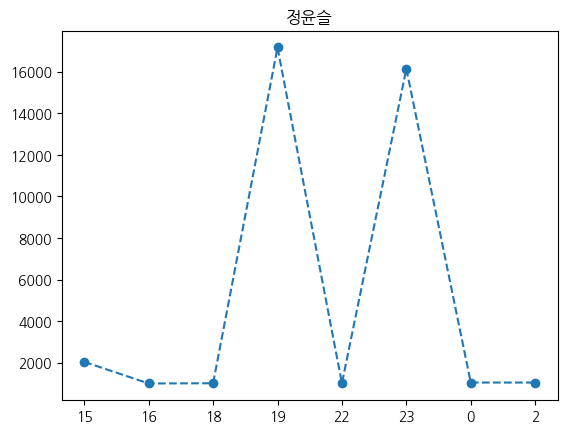

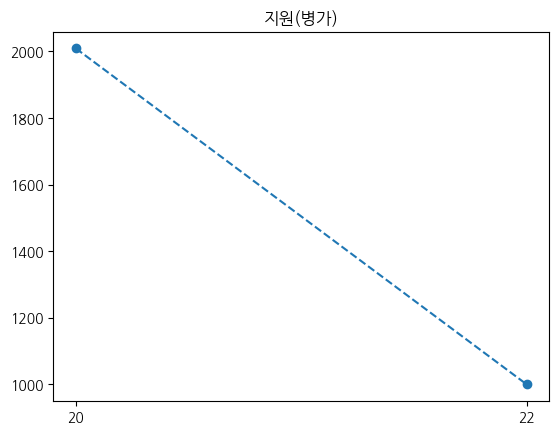

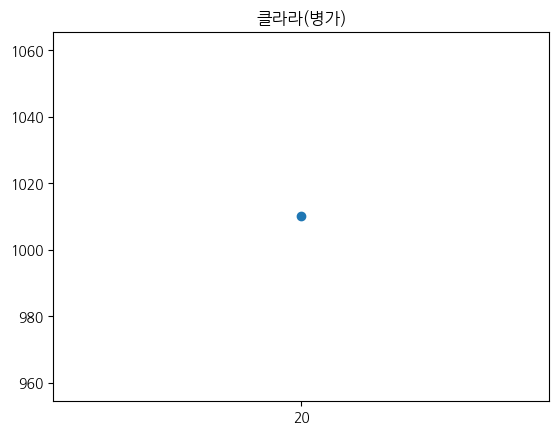

In [14]:
for i in BJ_list:
    BJ_time_df = re_df[re_df['참여BJ']==i].groupby(['day','hour'])['후원하트'].sum().reset_index()
    plt.plot(BJ_time_df['hour'],BJ_time_df['후원하트'],linestyle='--',marker='o')
    plt.title(i)
    plt.show()

## 5. 시청자별 하트후원 시계열 그래프

1022유하생일❤️풍운


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


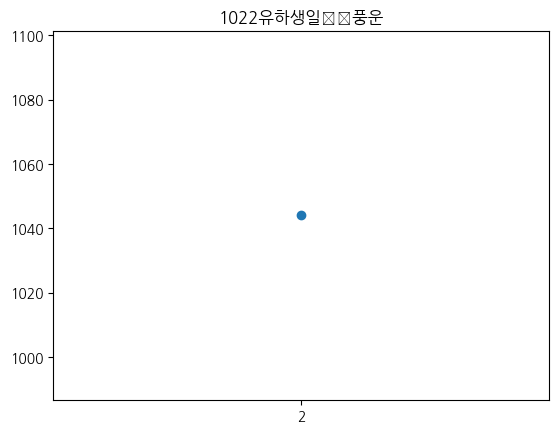

NameD요미⭐찡기


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


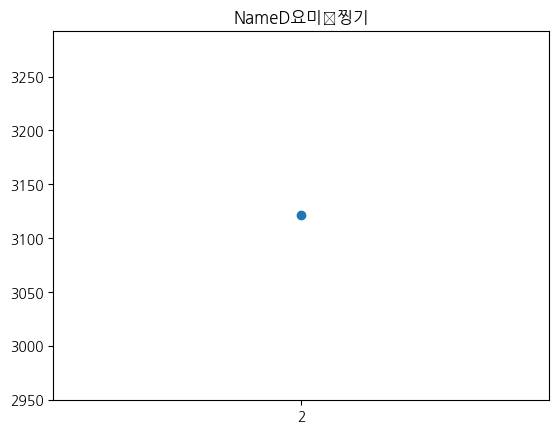

ZO지GO


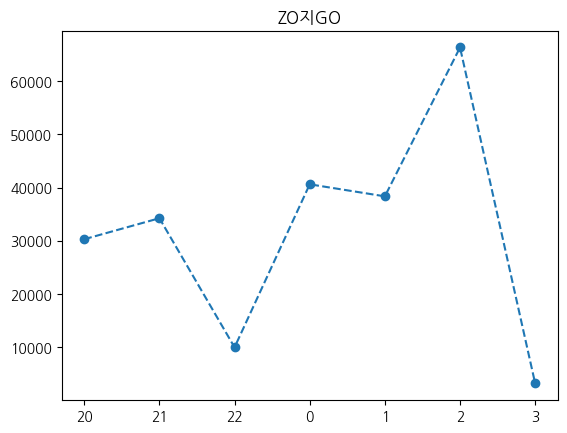

ෆ하빈이의ෆ팬될래


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3526 (\N{SINHALA LETTER FAYANNA}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Matplotlib currently does not support Sinhala natively.
  fig.canvas.print_figure(bytes_io, **kw)


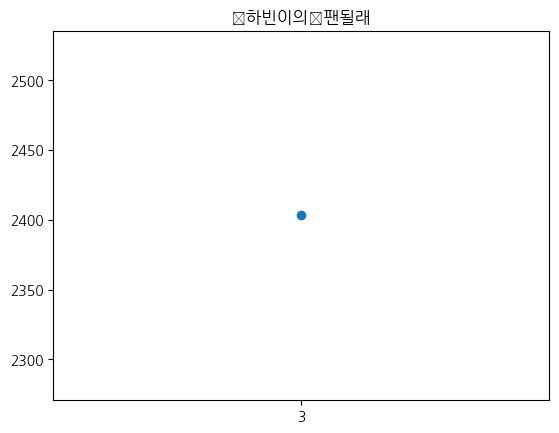

ღ새리웅니와따ღ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


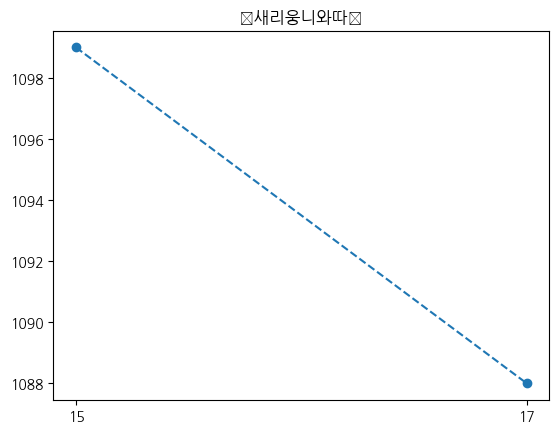

ღ시바꺼


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


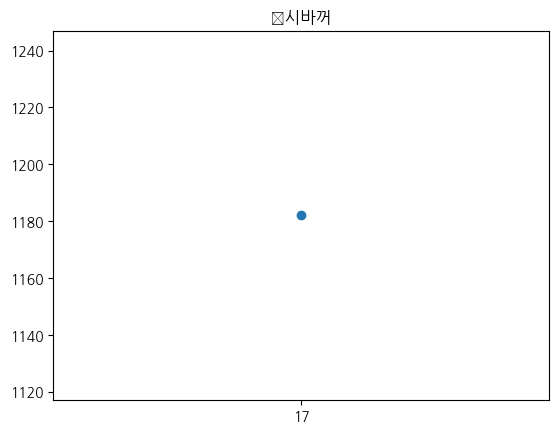

ღ시아ღTT


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


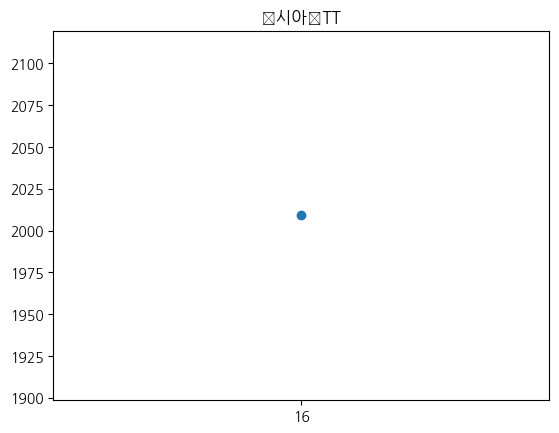

♔아롱당♔따롱❤️


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9812 (\N{WHITE CHESS KING}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


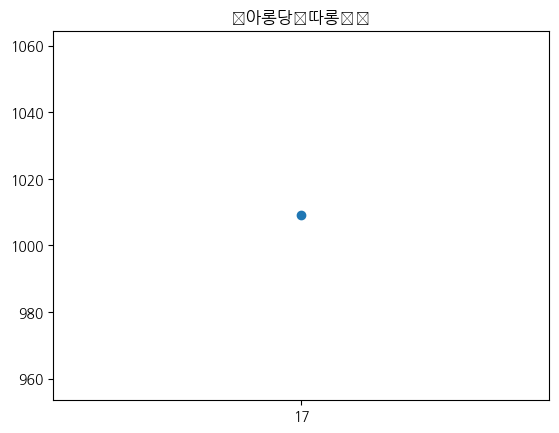

✨몰랑~지원~뇌졸증✨


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


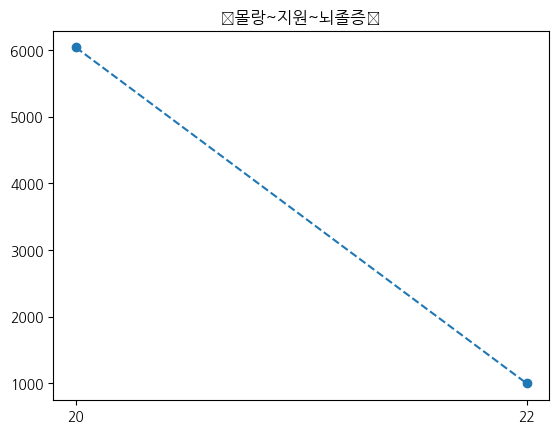

✨사장™


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


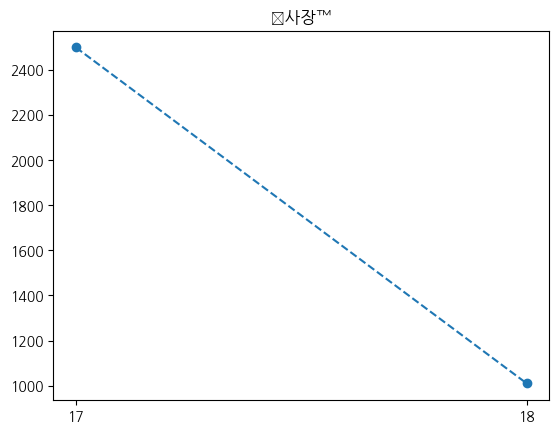

✨솔마단나다ᴮᴹ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 7470 (\N{MODIFIER LETTER CAPITAL B}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 7481 (\N{MODIFIER LETTER CAPITAL M}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


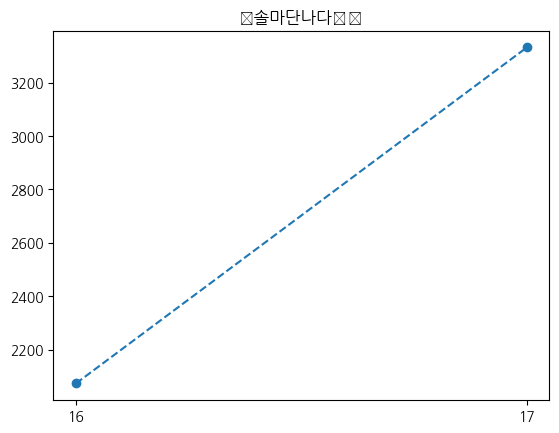

/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3526 (\N{SINHALA LETTER FAYANNA}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Matplotlib currently does not support Sinhala natively.
  fig.canvas.print_figure(bytes_io, **kw)


✨예디ෆting✨


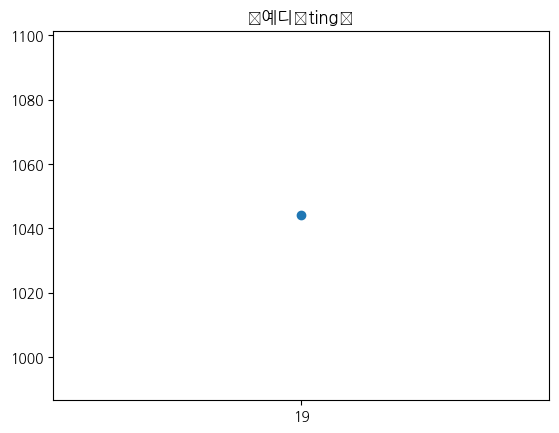

✿새나☾영남에너지⚡


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10047 (\N{BLACK FLORETTE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9790 (\N{LAST QUARTER MOON}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


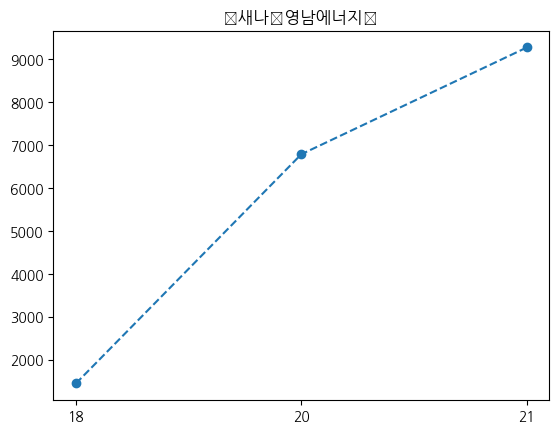

✿신시아✿⁀샤코™


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10047 (\N{BLACK FLORETTE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8256 (\N{CHARACTER TIE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


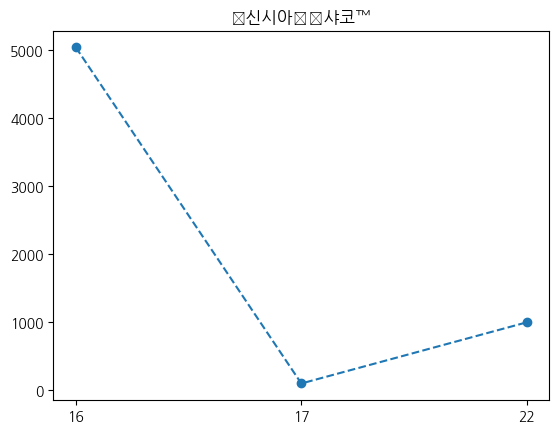

❥➳나옹


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10163 (\N{WHITE-FEATHERED RIGHTWARDS ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


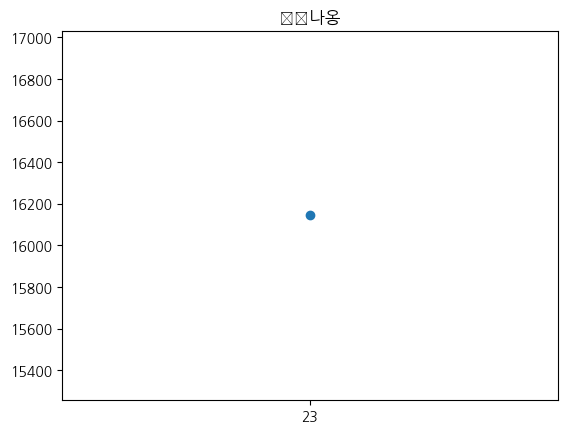

❥니야


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


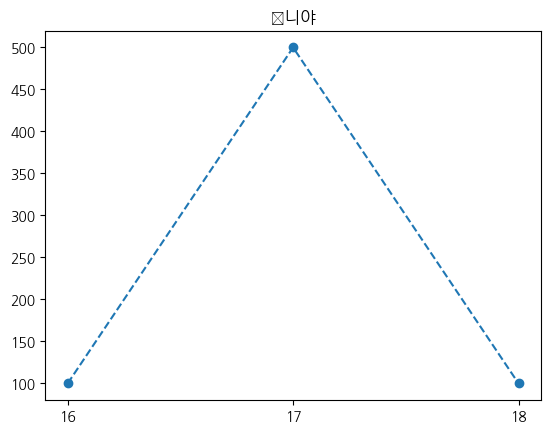

⭐✨카타르시스✨⭐


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


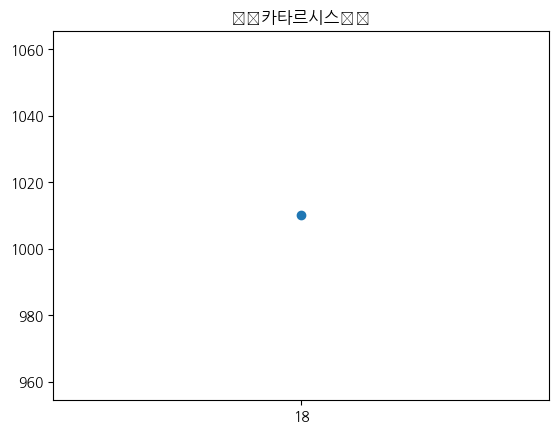

⭐금시월♡헬레빗⭐


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


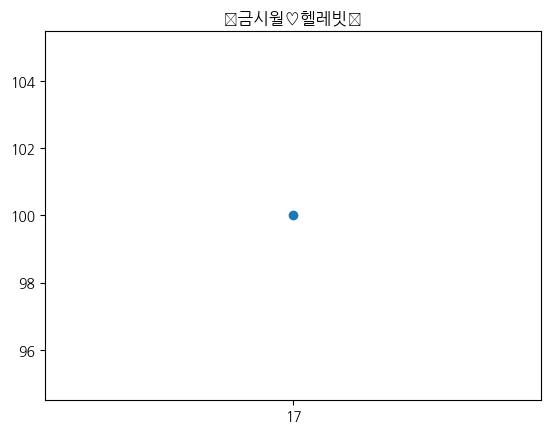

곰돌투투ღ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


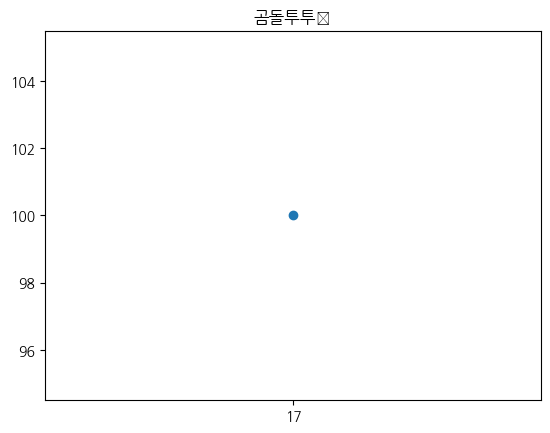

김광탁1


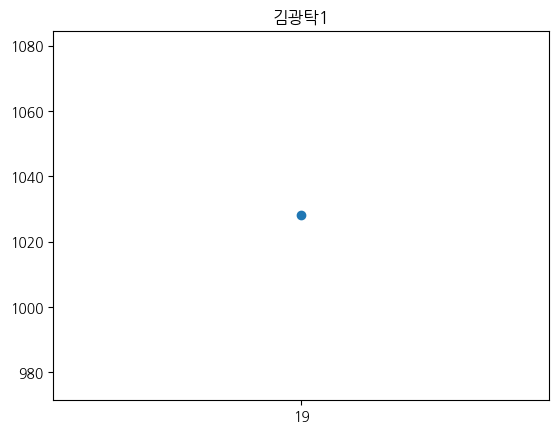

김이서♡악마집사깐따삐야


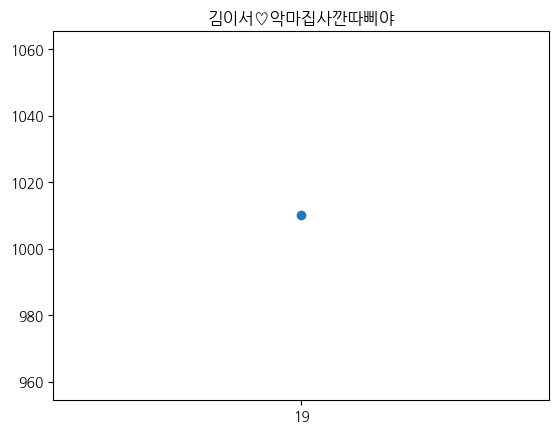

나는야잼미니서와와ෆ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3526 (\N{SINHALA LETTER FAYANNA}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Matplotlib currently does not support Sinhala natively.
  fig.canvas.print_figure(bytes_io, **kw)


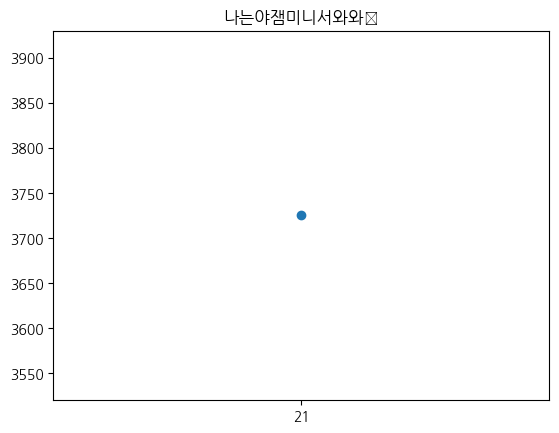

나연입니다만❤️하꼬레이


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


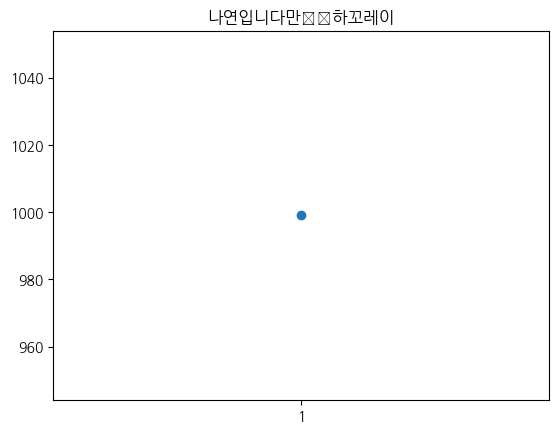

나오PANDA


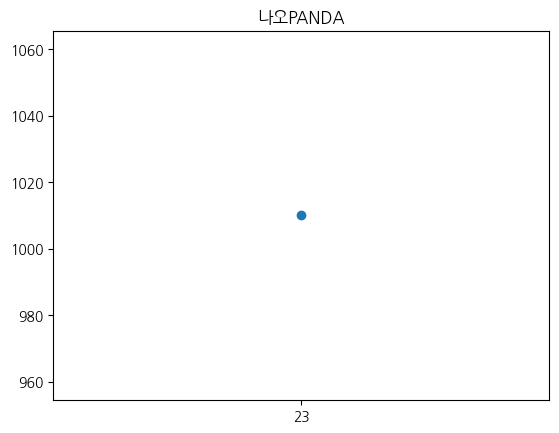

나이키매니아문래


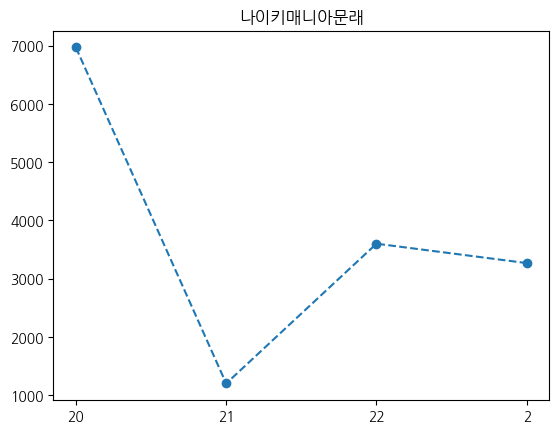

드렁큰베어⚘


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9880 (\N{FLOWER}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


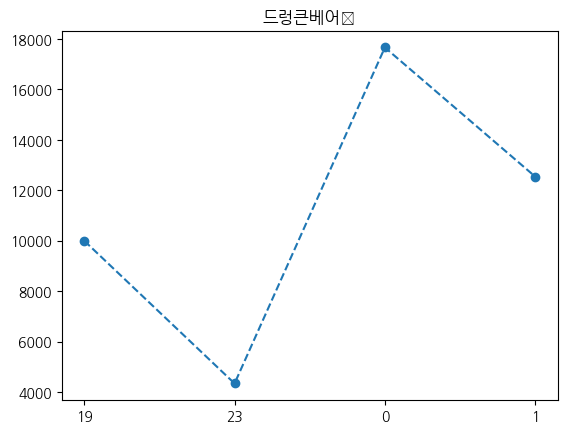

또혜❥김치


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


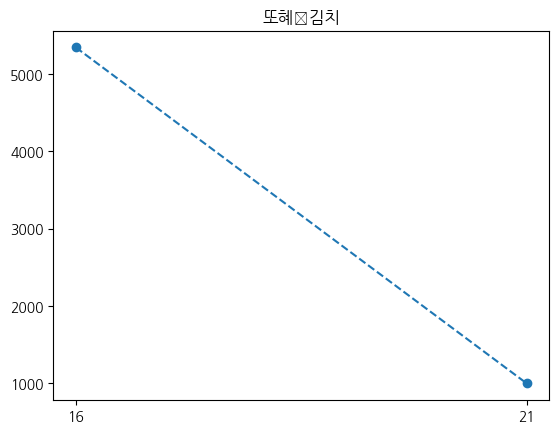

램보를기니ss


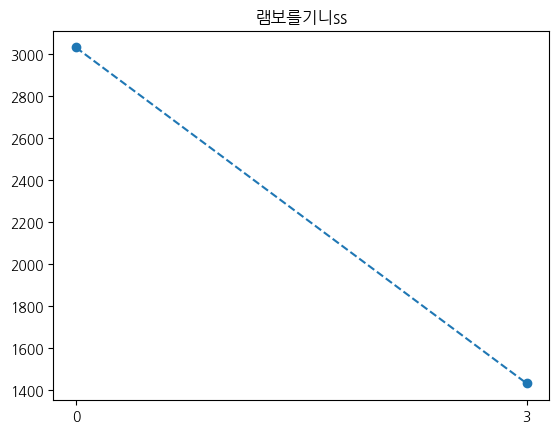

린아❥1004관짝뮤즈


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


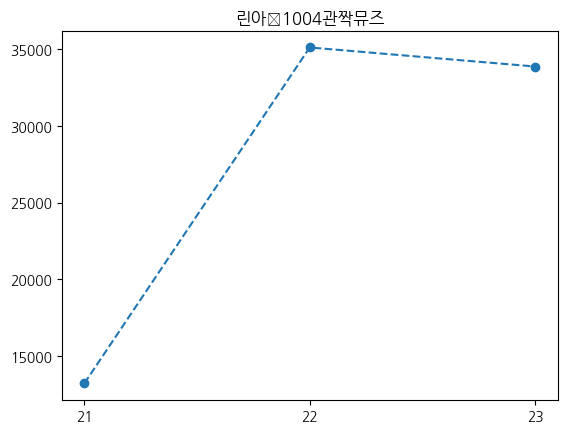

마스터☆피스


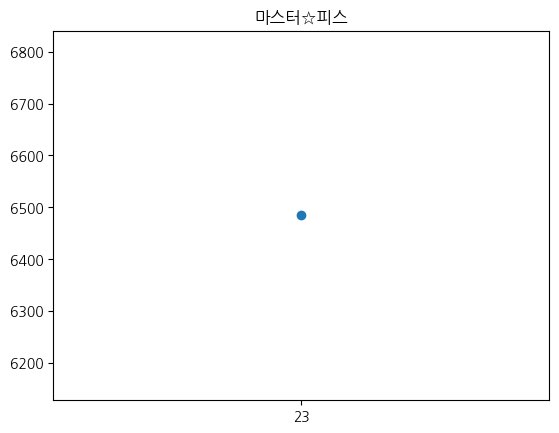

맨체


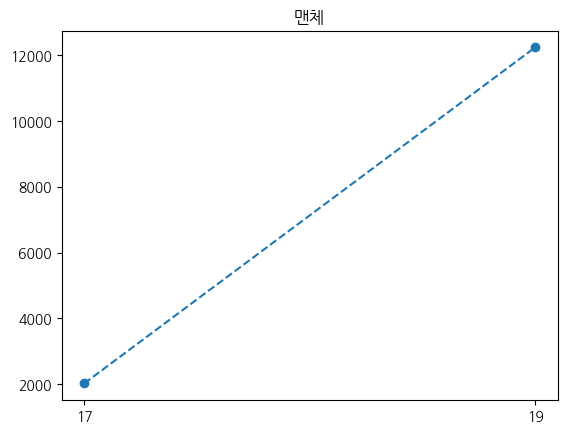

머더❤️로긴찬


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


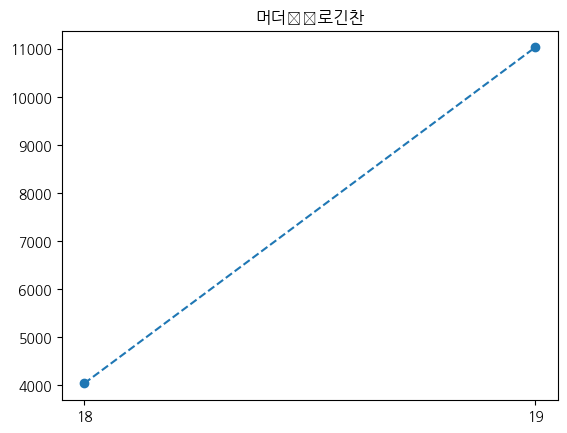

바니빈ෆ눈먼천사


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3526 (\N{SINHALA LETTER FAYANNA}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Matplotlib currently does not support Sinhala natively.
  fig.canvas.print_figure(bytes_io, **kw)


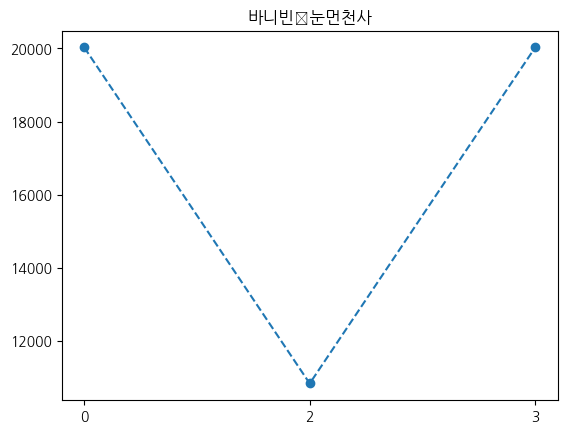

벤틀리14년식♣️구형♣️


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


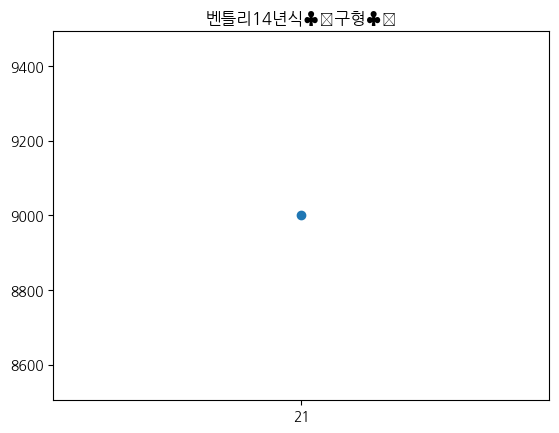

새리웅니형부


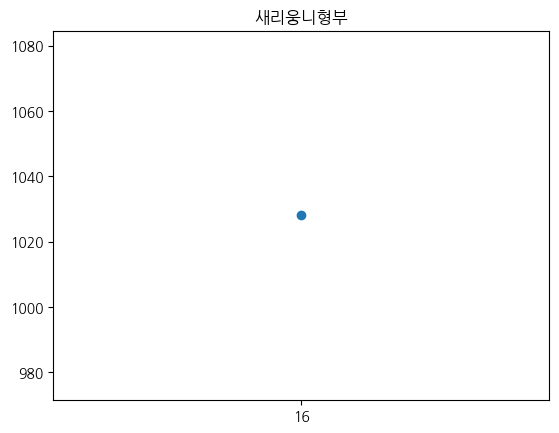

소야ღ푸시


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


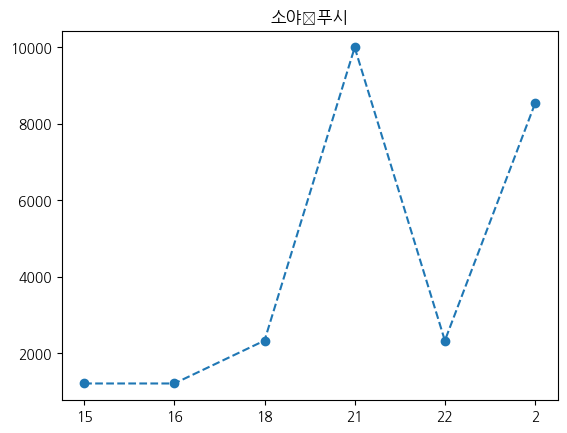

수하화이팅


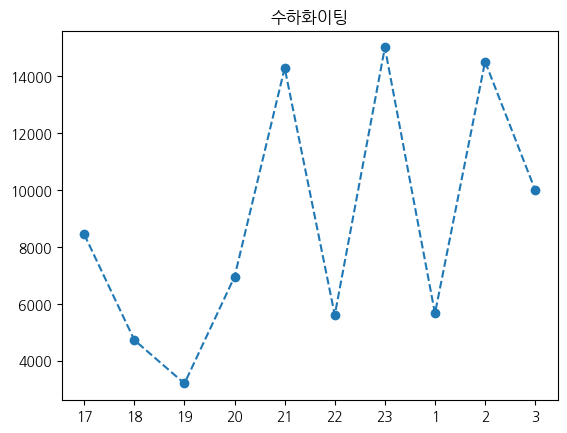

시카노코노코노코호시탕탕


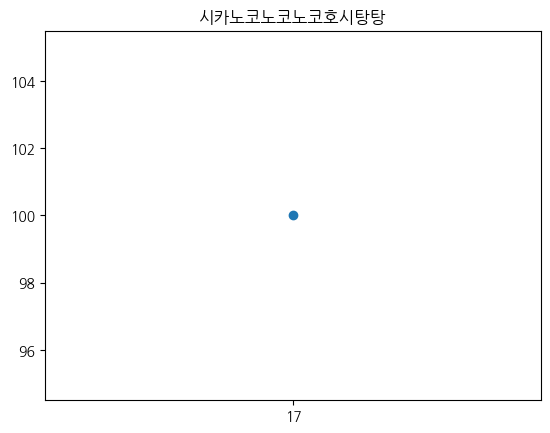

아기천사군군❤️


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


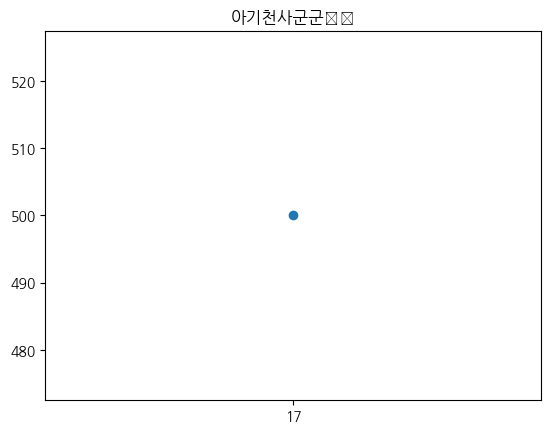

왔다는걸잊지마


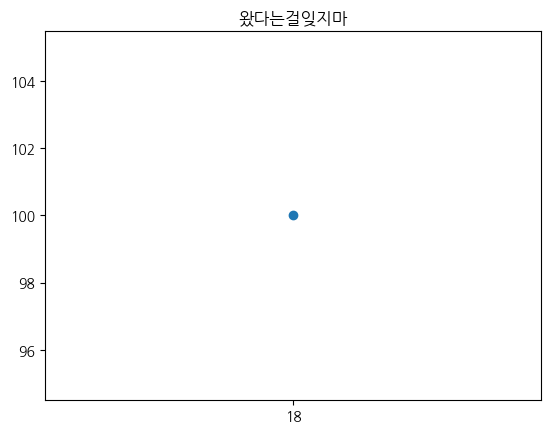

은채궁에하트못터는김루팡


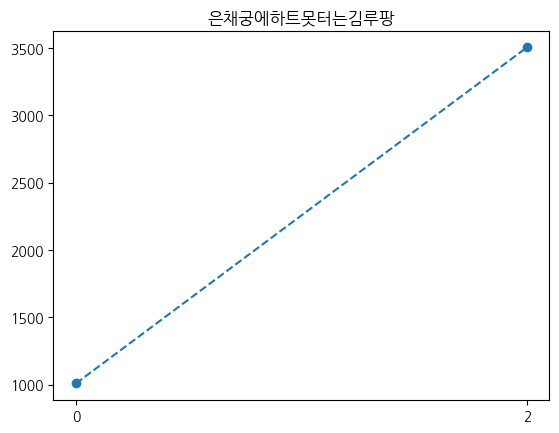

은채궁에하트터는김루팡


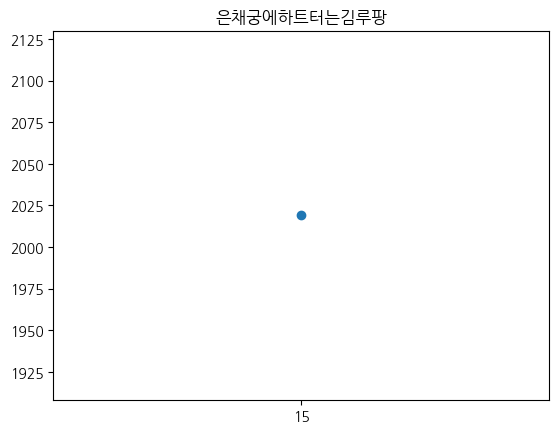

이름이무엇일까요


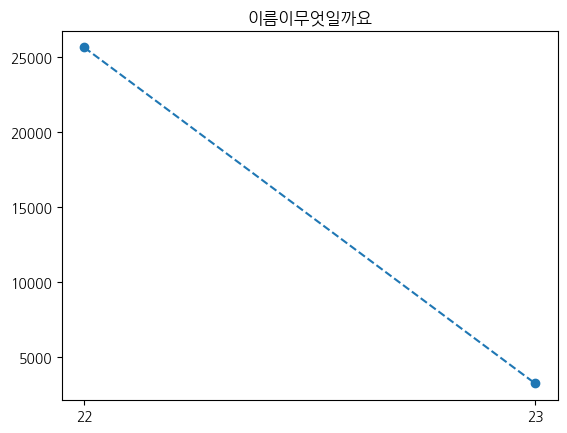

인성좋은⚡레닌™


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


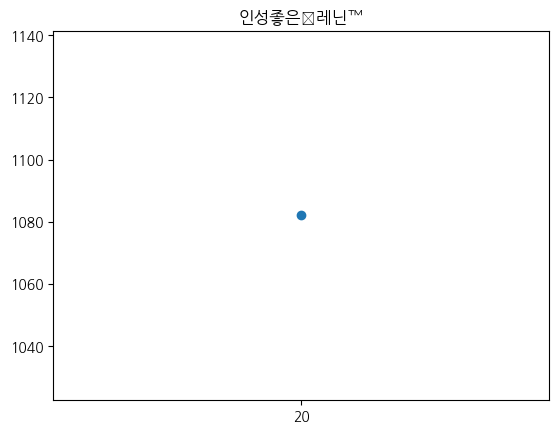

재벌박회장


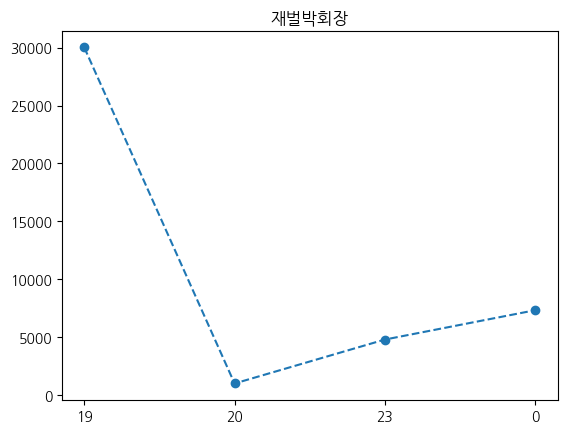

정윤슬➳❥Kix◡x


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10163 (\N{WHITE-FEATHERED RIGHTWARDS ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9697 (\N{LOWER HALF CIRCLE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


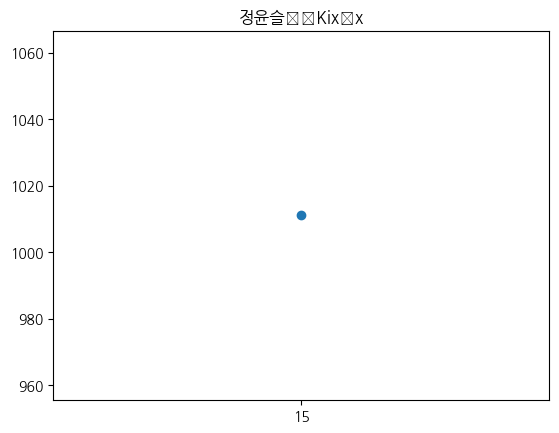

정윤슬➳❥독사단지갑


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10163 (\N{WHITE-FEATHERED RIGHTWARDS ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


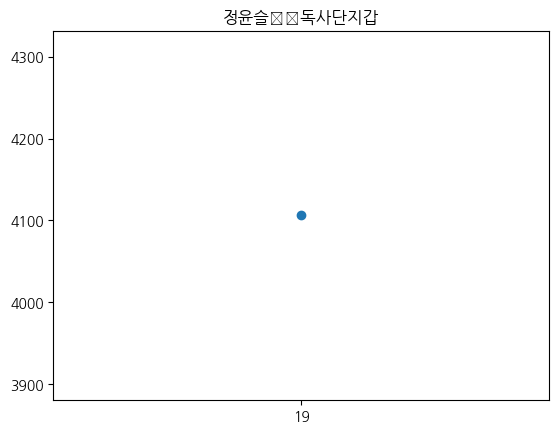

짭채냥


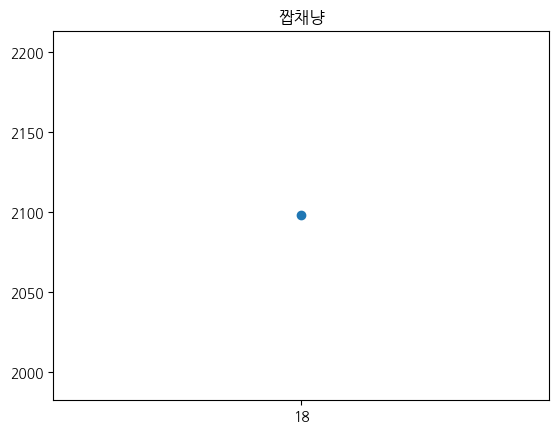

쫄보b


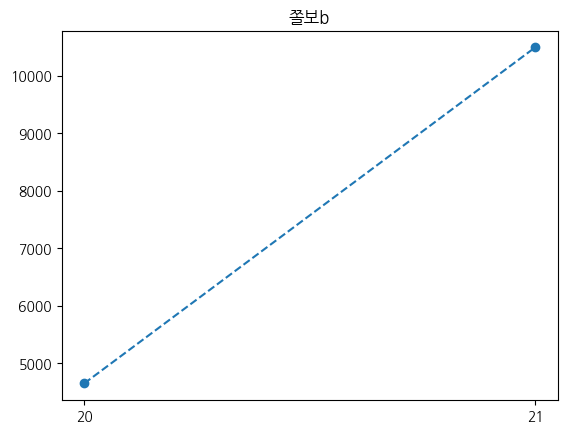

쫌만잘께요❥니야


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


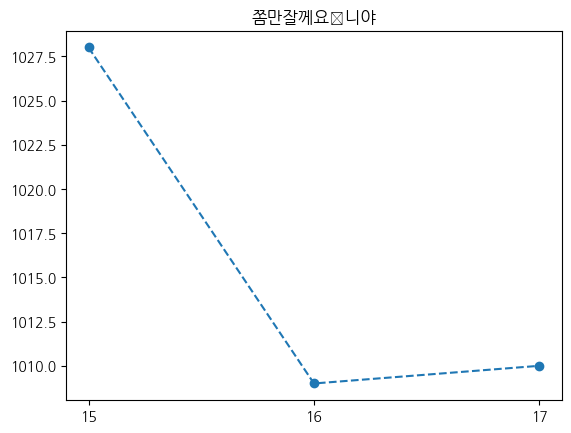

판다전문가❤️


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


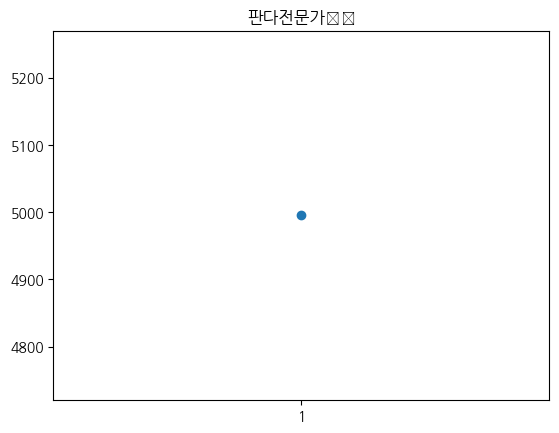

한가을ღ유깡


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


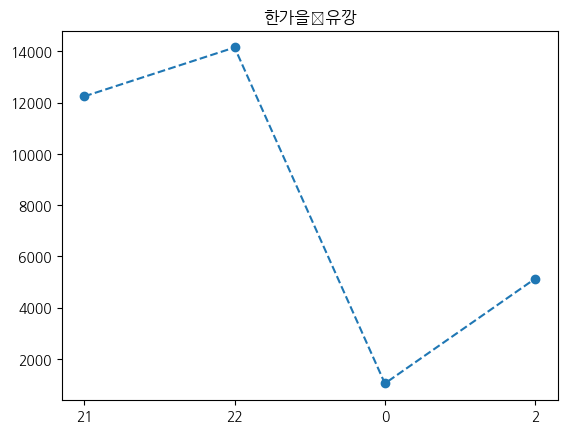

한지우☾김야로


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9790 (\N{LAST QUARTER MOON}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


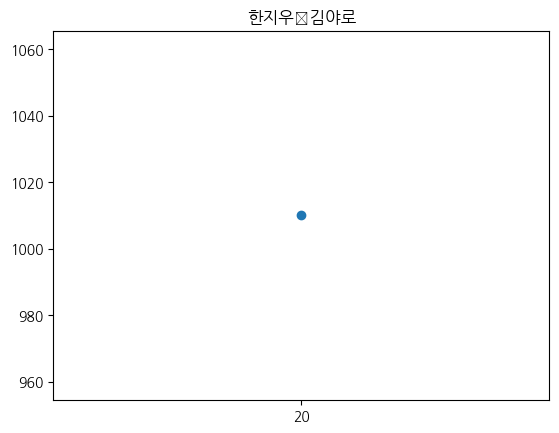

현생가용


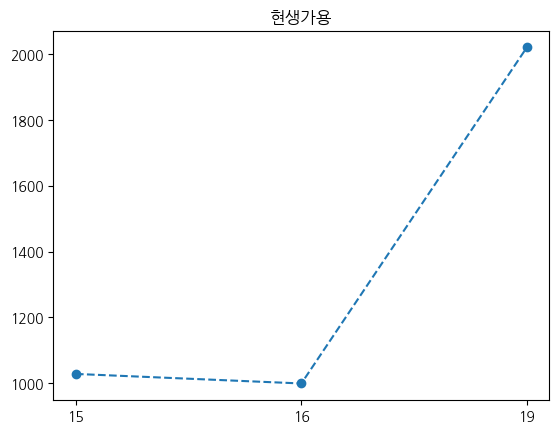

현생간농부


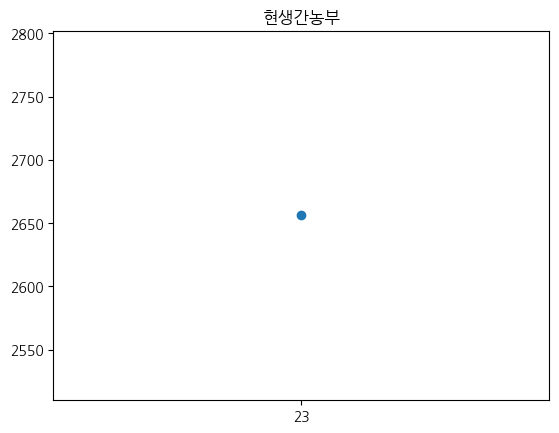

In [15]:
for i in VIP_list:
    VIP_time_df = re_df[re_df['후원 아이디(닉네임)']==i].groupby(['day','hour'])['후원하트'].sum().reset_index()
    print(i)
    plt.plot(VIP_time_df['hour'],VIP_time_df['후원하트'],linestyle='--',marker='o')
    plt.title(i)
    plt.show()

In [16]:
re_df2 = re_df.set_index('후원시간')

In [17]:
df_10m = pd.DataFrame()

df_10m['min'] = re_df2.후원하트.resample('10T').min()
df_10m['max'] = re_df2.후원하트.resample('10T').max()
df_10m['mean'] = re_df2.후원하트.resample('10T').mean()
df_10m['median'] = re_df2.후원하트.resample('10T').median()
df_10m['sum'] = re_df2.후원하트.resample('10T').sum()

/tmp/ipykernel_77597/916355910.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10m['min'] = re_df2.후원하트.resample('10T').min()
/tmp/ipykernel_77597/916355910.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10m['max'] = re_df2.후원하트.resample('10T').max()
/tmp/ipykernel_77597/916355910.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10m['mean'] = re_df2.후원하트.resample('10T').mean()
/tmp/ipykernel_77597/916355910.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10m['median'] = re_df2.후원하트.resample('10T').median()
/tmp/ipykernel_77597/916355910.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10m['sum'] = re_df2.후원하트.resample('10T').sum()


In [18]:
df_10m

,min,max,mean,median,sum
후원시간,,,,,
2024-10-03 15:30:00,1011.0,1028.0,1022.333333,1028.0,3067
2024-10-03 15:40:00,1009.0,1009.0,1009.000000,1009.0,1009
2024-10-03 15:50:00,1010.0,1200.0,1103.000000,1099.0,3309
2024-10-03 16:00:00,1028.0,1200.0,1114.000000,1114.0,2228
2024-10-03 16:10:00,999.0,1010.0,1004.250000,1004.0,4017
...,...,...,...,...,...
2024-10-04 03:00:00,1433.0,10013.0,7864.750000,10006.5,31459
2024-10-04 03:10:00,NaN,NaN,NaN,NaN,0
2024-10-04 03:20:00,999.0,999.0,999.000000,999.0,999


## 6. 10분 집계당 시계열 통계 그래프

min


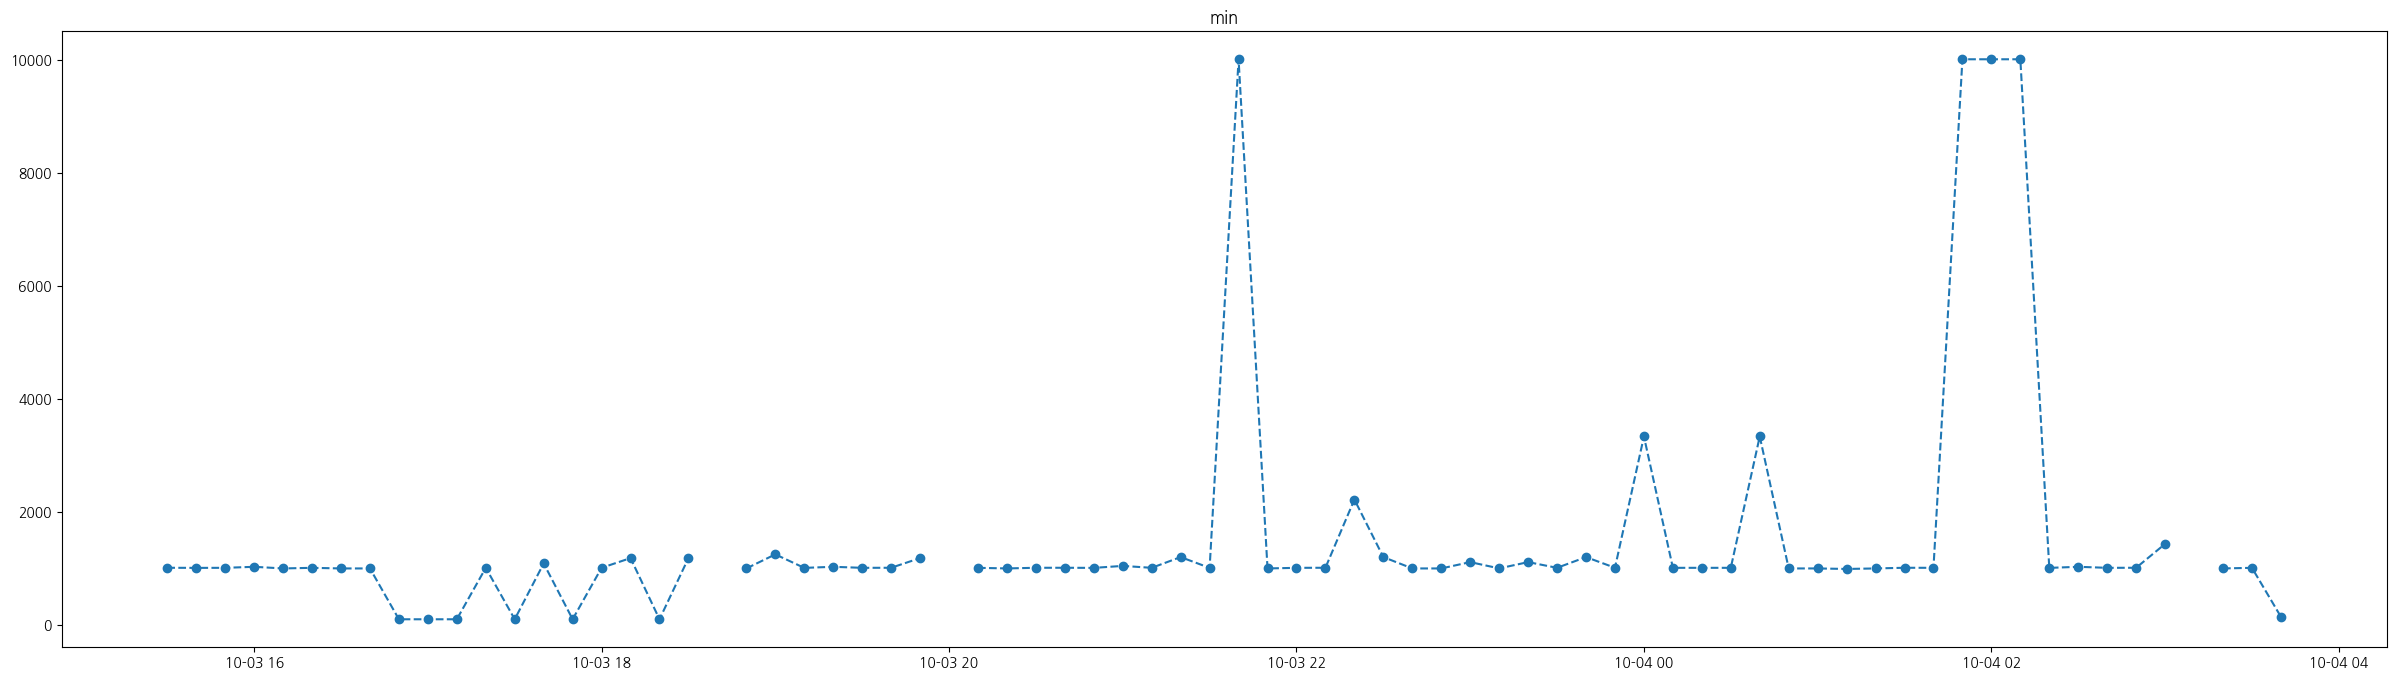

max


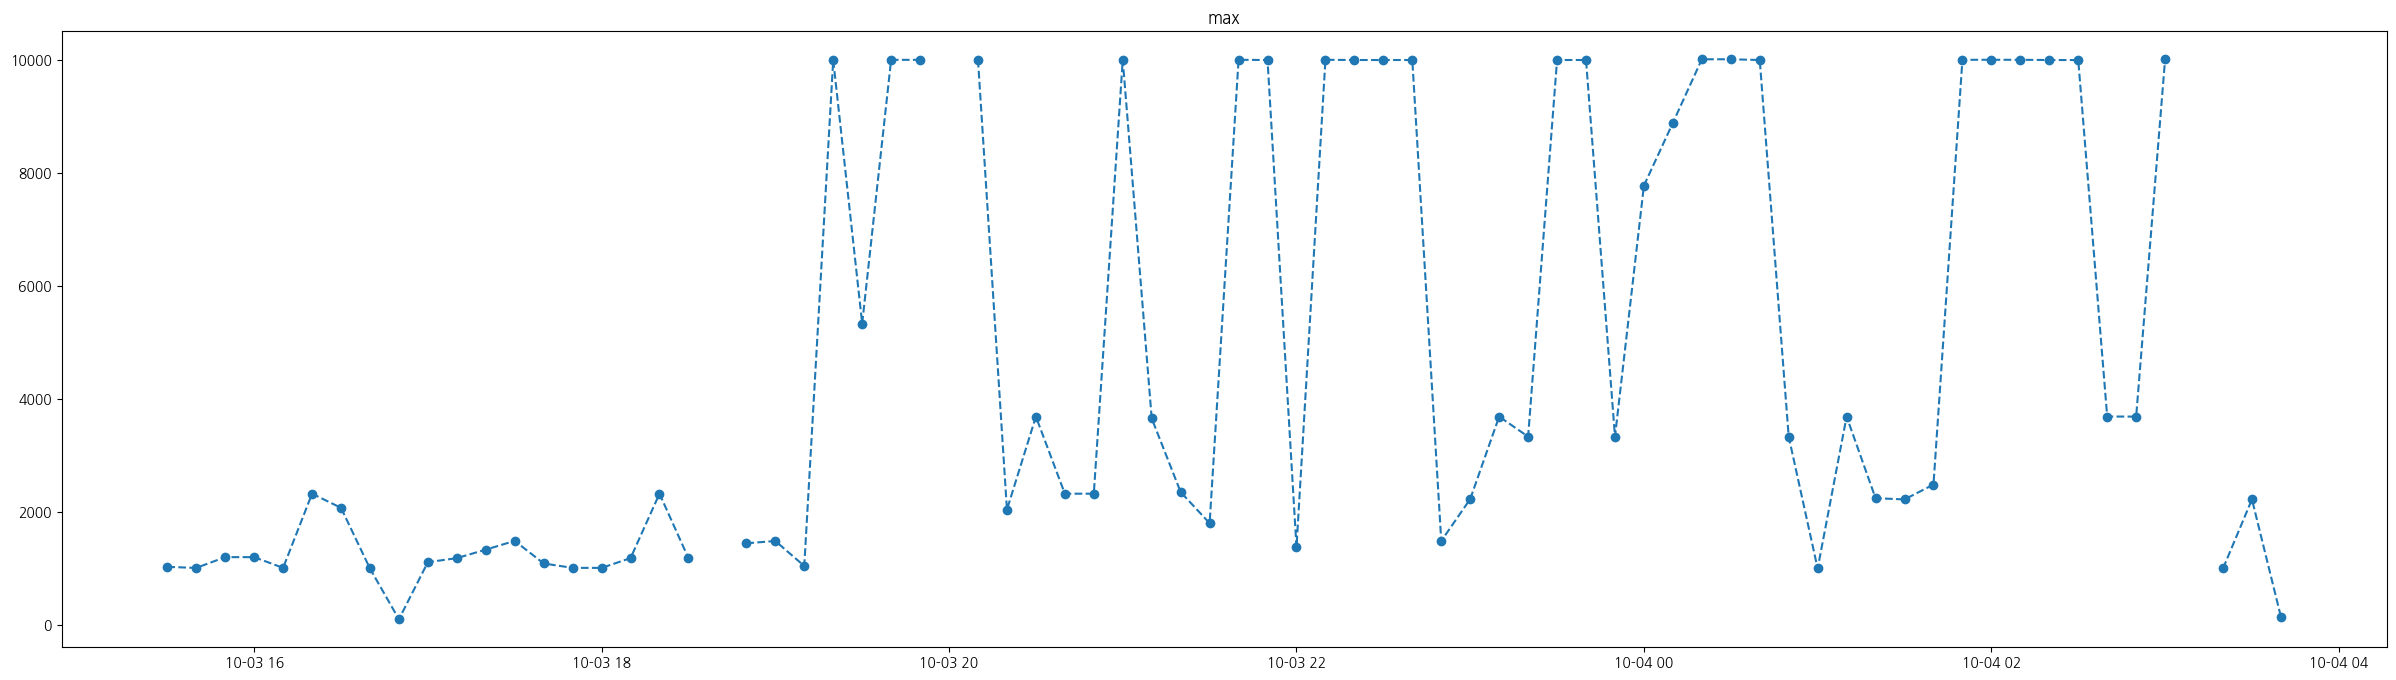

mean


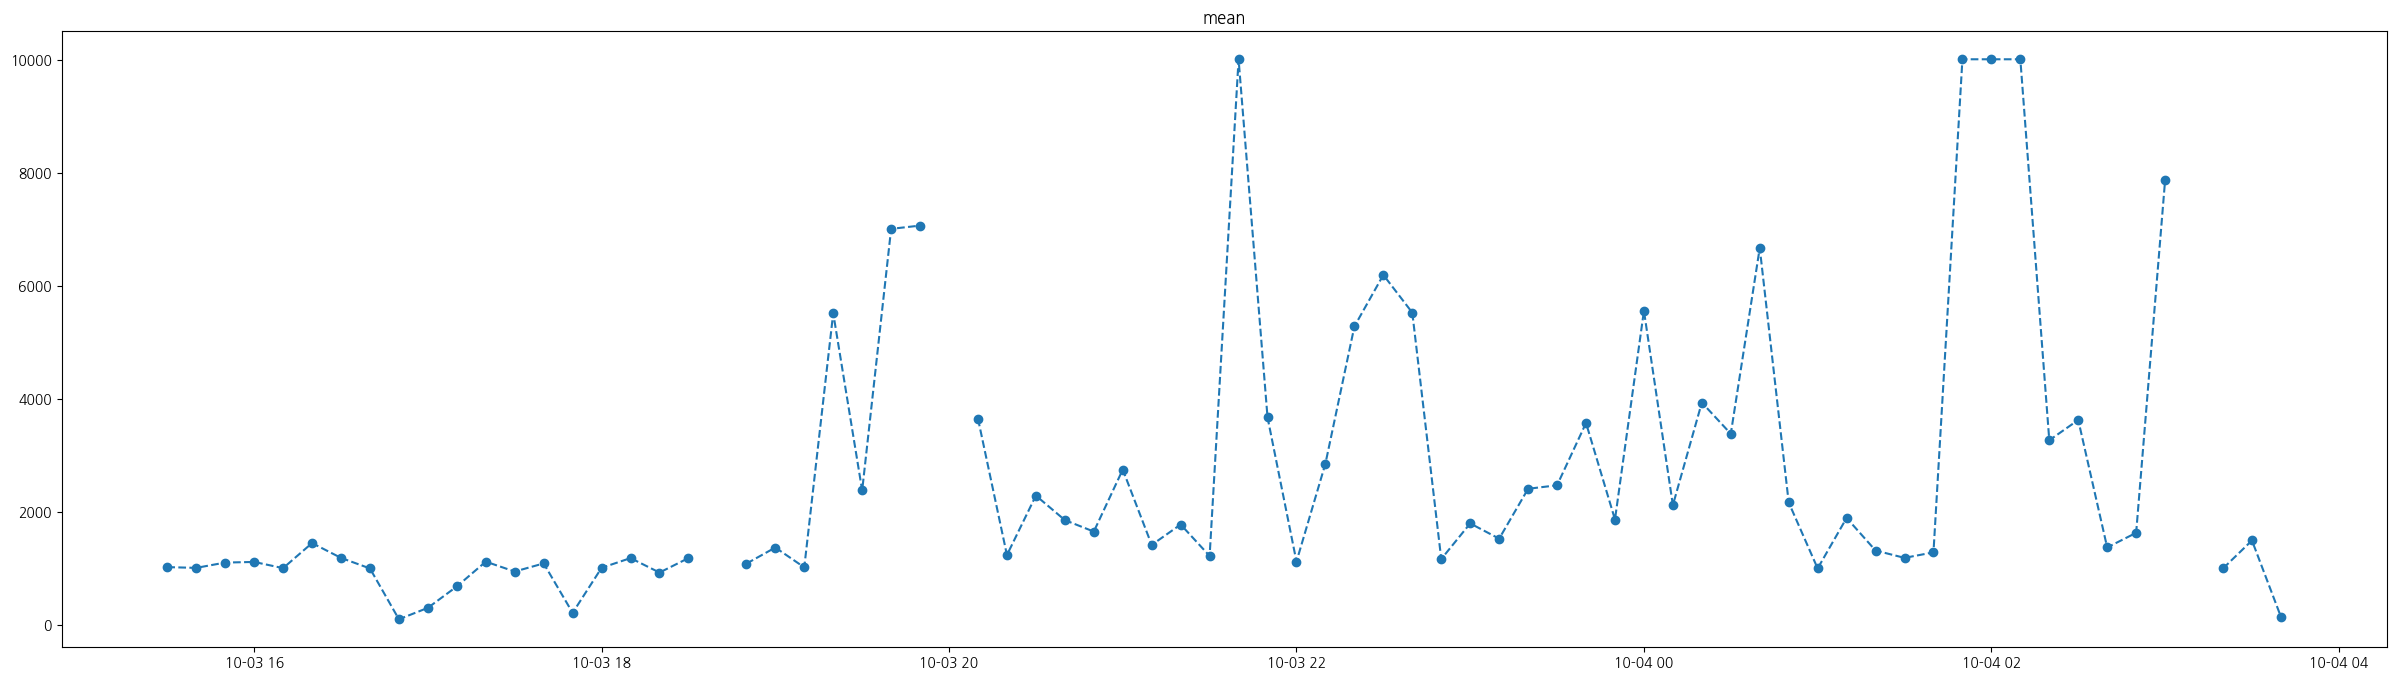

median


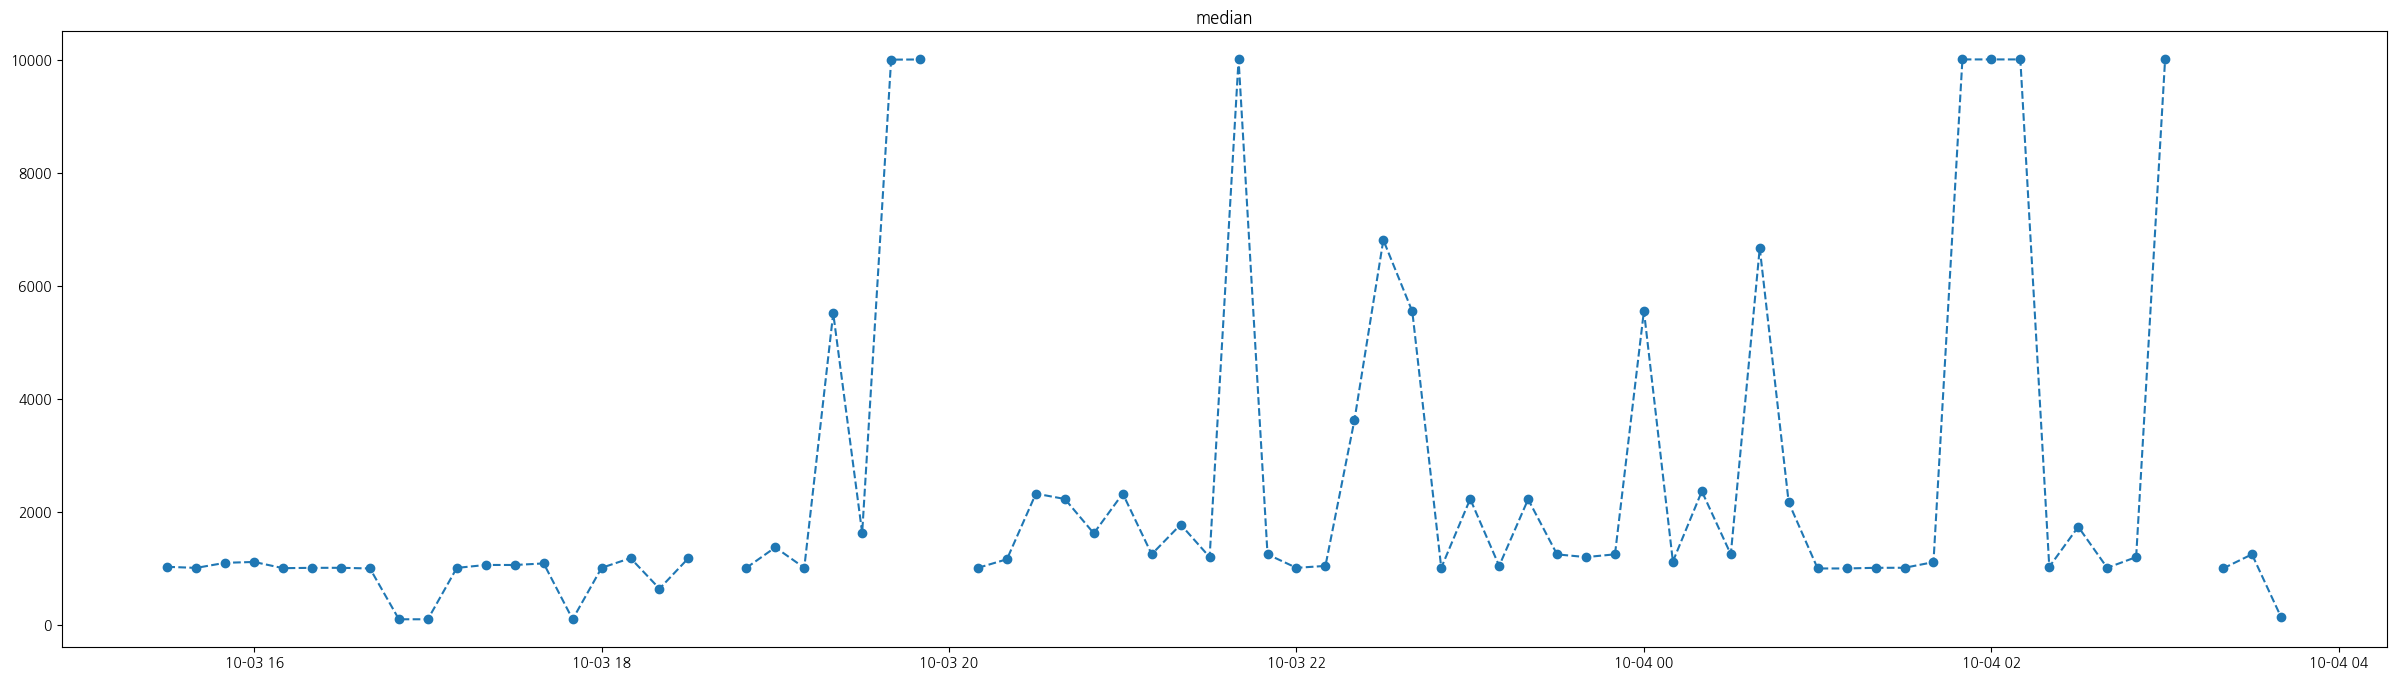

sum


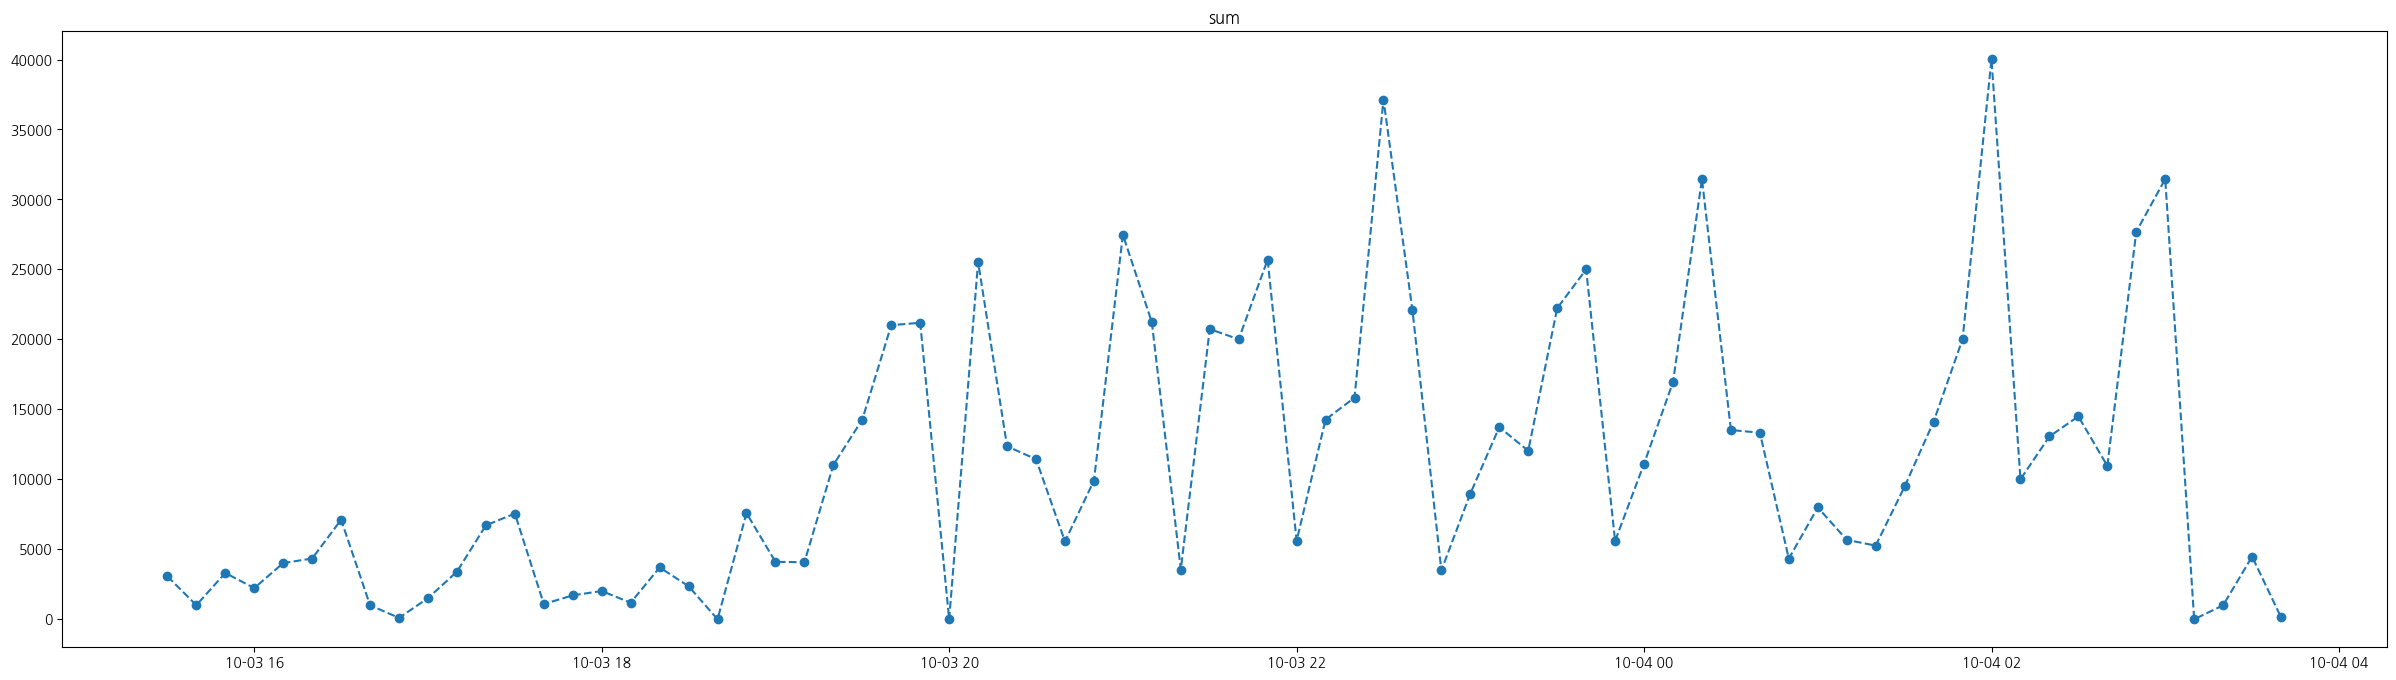

In [19]:
for i in list(df_10m.columns):
    print(i)
    plt.figure(figsize=(30,8))
    plt.plot(df_10m[i],linestyle='--',marker='o')
    plt.title(i)
    plt.show()